## Data Assessment

## Project Title :- Brain Tumor Prediction Using Image Classification (Group :- 11)

Our dataset consists the folder of brain's MRI image . The images are splitted into Training and Testing folders.
Each folder has more four subfolders of respective tumor classes. Brain-Tumors are classified into three categories
Glioma, Meningioma ,Pituitary and fourth class for No-tumor. For data preprocessing ,all images name are replaced
according to thier class and stored in a new folder 'raw'.
Exploratory data analysis is performed on csv file created from image description . Three new columns were added
Class, noise, brisquescore to check data quality.
Additionally , Three best images of each class is filtered and displayed .



In [91]:
#import necessary libraries
import os
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import imquality.brisque as brisque
from skimage import io,img_as_float
from skimage import io
import imgaug as ia
from imgaug import augmenters as iaa
import os
from PIL import Image
from matplotlib.image import imread
import cv2
import numpy as np

## Renaming images names according to their class

In [ ]:
folder = r'E:/Brain_tumor/Testing/glioma_tumor/'
count = 1
for file_name in os.listdir(folder):
    # Construct old file name
    source = folder + file_name
  

    destination = r'E:/raw/' + "glioma_" + file_name 
    print(destination)
    # Renaming the file
    os.rename(source, destination)
    count += 1
res = os.listdir(r'E:/raw/')
#print('All Files Renamed')


# Creating a meta data further extracting image names, size and dimensions and writing it to a CSV file. Renaming the image names with specific class to avoid duplicate values while creating meta data.

In [ ]:
folder = r'E:/Brain_tumor/Testing/meningioma_tumor/'
count = 1
for file_name in os.listdir(folder):
    # Construct old file name
    source = folder + file_name
  

    destination = r'E:/raw/' + "meningioma_" + file_name 
    print(destination)
    # Renaming the file
    os.rename(source, destination)
    count += 1
res = os.listdir(r'E:/raw/')
#print('All Files Renamed')

In [ ]:
folder = r'E:/Brain_tumor/Testing/pituitary_tumor/'
count = 1
for file_name in os.listdir(folder):
    # Construct old file name
    source = folder + file_name
  

    destination = r'E:/raw/' + "pituitary_tumor_" + file_name 
    print(destination)
    # Renaming the file
    os.rename(source, destination)
    count += 1
res = os.listdir(r'E:/raw/')
#print('All Files Renamed')

In [ ]:
folder = r'E:/Brain_tumor/Testing/no_tumor/'
count = 1
for file_name in os.listdir(folder):
    # Construct old file name
    source = folder + file_name
  

    destination = r'E:/raw/' + "no_tumor_" + file_name 
    print(destination)
    # Renaming the file
    os.rename(source, destination)
    count += 1
res = os.listdir(r'E:/raw/')
#print('All Files Renamed')

In [13]:
#code for extracting image names, size and dimensions and writing it to a CSV file

import os
import csv
from PIL import Image

# List of image files in the directory
images_dir = 'C:/Users/bogha/raw/'
image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

# Extracting image names and dimensions and storing in a list of dictionaries
image_details = []
for image_file in image_files:
    image_path = os.path.join(images_dir, image_file)
    with Image.open(image_path) as img:
        image_details.append({'name': image_file, 'width': img.width, 'height': img.height , 'size' : os.path.getsize(image_path) , 'Class' : 'unique_class' })

# Writing the extracted information to a CSV file
filename = 'images_details.csv'
with open(filename, 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=['name', 'width', 'height','size','Class'])
    writer.writeheader()
    writer.writerows(image_details)

print(f"The file '{filename}' has been saved successfully.")

The file 'images_details.csv' has been saved successfully.


# ‘image_details’ is a dataframe we made, consisting of names of all images extracted and their respective dimensions.We’ll have a look at it to understand the image dataset we have at hand.

In [ ]:
 image_details

In [15]:
#loading images_details into dataframe
df = pd.DataFrame(image_details)  
df.columns

Index(['name', 'width', 'height', 'size', 'Class'], dtype='object')

In [17]:
df.head

<bound method NDFrame.head of                                name  width  height   size         Class
0                             1.jpg    350     350  35830  unique_class
1                             2.jpg    350     350  36763  unique_class
2                             3.jpg    605     613  41675  unique_class
3                             4.jpg    562     592  63465  unique_class
4                             5.jpg    442     442  26161  unique_class
...                             ...    ...     ...    ...           ...
3259  pituitary_tumor_image(95).jpg    383     436  35727  unique_class
3260  pituitary_tumor_image(96).jpg    512     512  46623  unique_class
3261  pituitary_tumor_image(97).jpg    512     512  46623  unique_class
3262  pituitary_tumor_image(98).jpg    538     548  80129  unique_class
3263      pituitary_tumor_image.jpg    512     512  38348  unique_class

[3264 rows x 5 columns]>

## Checking the null value in df

In [18]:
df.isnull().sum()

name      0
width     0
height    0
size      0
Class     0
dtype: int64

## Column specification

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3264 non-null   object
 1   width   3264 non-null   int64 
 2   height  3264 non-null   int64 
 3   size    3264 non-null   int64 
 4   Class   3264 non-null   object
dtypes: int64(3), object(2)
memory usage: 127.6+ KB


## Adding 3 new columns class,noise and brisque score

In [20]:
df["Class"] = ""
df["noise"] = ""
df["brisquescore"] = ""

In [22]:
df.shape

(3264, 7)

## Exctracting class names from the image files

In [23]:
df['name'] = df['name'].str[:-4]
df.loc[df['name'].str.startswith("p"),'Class'] =  "pituitary"
df.loc[df['name'].str.startswith("m"),'Class'] =  "meningioma"
df.loc[df['name'].str.startswith("g"),'Class'] =  "glioma"
df['Class'].replace('', 'No-tumor', inplace=True)

In [24]:
df

,name,width,height,size,Class,noise,brisquescore
0,1,350,350,35830,No-tumor,,
1,2,350,350,36763,No-tumor,,
2,3,605,613,41675,No-tumor,,
3,4,562,592,63465,No-tumor,,
4,5,442,442,26161,No-tumor,,
...,...,...,...,...,...,...,...
3259,pituitary_tumor_image(95),383,436,35727,pituitary,,
3260,pituitary_tumor_image(96),512,512,46623,pituitary,,
3261,pituitary_tumor_image(97),512,512,46623,pituitary,,
3262,pituitary_tumor_image(98),538,548,80129,pituitary,,


## From above result we can see that we have all together 3264 tumor img displed with their width, height, size, class, noise, and brisquescore. 

In [26]:
unique_class = df['Class'].value_counts()
unique_class

meningioma    937
glioma        926
pituitary     901
No-tumor      500
Name: Class, dtype: int64

# Here we have extracted the distribution of img in each class.where we can see that all the tumor class has almost double the number of images to that of no tumor class. 

## Fetching noise and brisquescore using python libraries

In [ ]:

folder = 'C:/Users/bogha/raw/'

arr = []
scorearr= []

for filename in os.listdir(folder):
    if filename.endswith('.jpg'):
        image = io.imread(os.path.join(folder, filename))

        # check the image format
        print(f'Image Name: {filename}')
        print(f'Image format: {image.dtype}')
        print(filename)
        print(folder)

        # check the image resolution
        print(f'Image shape: {image.shape}')

        # check the image brisquescore
        img1 = img_as_float(io.imread(f'{folder}{filename}',as_gray =True))
        score = brisque.score(img1)
        print(f'Image brisquescore : {score}')
        scorearr.append(score)

        
        # check the image noise
        noise = np.std(image)
        print(f'Image noise: {noise}')
        arr.append(noise)


In [31]:
df['noise'] = arr
df['brisquescore'] = scorearr

In [32]:
df

,name,width,height,size,Class,noise,brisquescore
0,1,350,350,35830,No-tumor,60.988672,22.729963
1,2,350,350,36763,No-tumor,50.356683,14.992626
2,3,605,613,41675,No-tumor,46.056565,58.116659
3,4,562,592,63465,No-tumor,79.565990,28.927595
4,5,442,442,26161,No-tumor,48.439813,49.475351
...,...,...,...,...,...,...,...
3259,pituitary_tumor_image(95),383,436,35727,pituitary,50.369006,38.014856
3260,pituitary_tumor_image(96),512,512,46623,pituitary,38.441106,56.416731
3261,pituitary_tumor_image(97),512,512,46623,pituitary,38.441106,56.416731
3262,pituitary_tumor_image(98),538,548,80129,pituitary,51.000917,27.942650


## Checking null values

In [45]:
df.isna().sum()

name            0
width           0
height          0
size            0
Class           0
noise           0
brisquescore    0
dtype: int64

## Saving df to csva

In [33]:
df.to_csv('C:/Users/bogha/Downloads/images_details.csv', index=False)

## Counting images of each class and creating a plot

In [35]:
unique_class

meningioma    937
glioma        926
pituitary     901
No-tumor      500
Name: Class, dtype: int64

# Plotting graph for each class count as mentioned above we can now clearly see that noise is almost half the other classes mentioned.

<AxesSubplot:xlabel='Class', ylabel='count'>

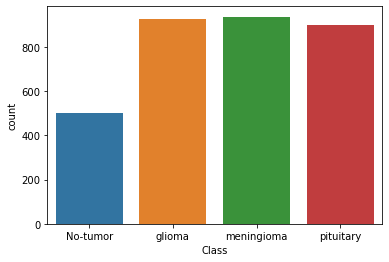

In [42]:
sns.countplot(x=df['Class'])

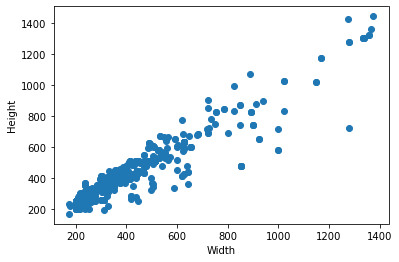

In [46]:
# Create the scatter plot
plt.scatter(df.width, df.height)

# Label the axes
plt.xlabel('Width')
plt.ylabel('Height')

# Display the plot
plt.show()

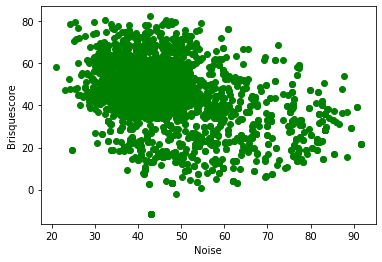

In [134]:
# Create the scatter plobrisquet
plt.scatter(df.noise, df.brisquescore,c='green')

# Label the axes
plt.xlabel('Noise')
plt.ylabel('Brisquescore')

# Display the plot
plt.show()

## Filtering images using brisquescore and noise

In [129]:

grouped = df.groupby('Class')

display_images = {}


for name, group in grouped:
    # Sort the group by "noise" and "brisquescore" in ascending order
    sorted_group = group.sort_values(by=['noise', 'brisquescore'])
    
    # Select the first three rows of the sorted group
    selected_group = sorted_group.iloc[:3, :]
     # Add the selected group to the dictionary under the class name
    display_images[name] = selected_group
    
selected_df = pd.concat(display_images.values())

In [130]:
selected_df

,name,width,height,size,Class,noise,brisquescore
1073,image(170),852,480,28828,No-tumor,24.121515,78.871040
970,image (45),236,236,9825,No-tumor,24.671297,18.998145
2296,No_tumor_image(4),236,236,12408,No-tumor,24.671297,18.998145
543,gg (581),512,512,19035,glioma,21.021132,58.442184
226,gg (296),512,512,21494,glioma,23.960470,52.730299
499,gg (541),512,512,13285,glioma,25.487901,79.756662
1977,m3 (172),512,512,30585,meningioma,25.337627,47.906435
1973,m3 (169),512,512,25465,meningioma,26.092971,44.875511
1976,m3 (171),512,512,31376,meningioma,27.796018,48.326766
3094,p (758),512,512,29284,pituitary,22.994571,47.311151


## Plotting best images using brisquescore and noise

Class : No-tumor


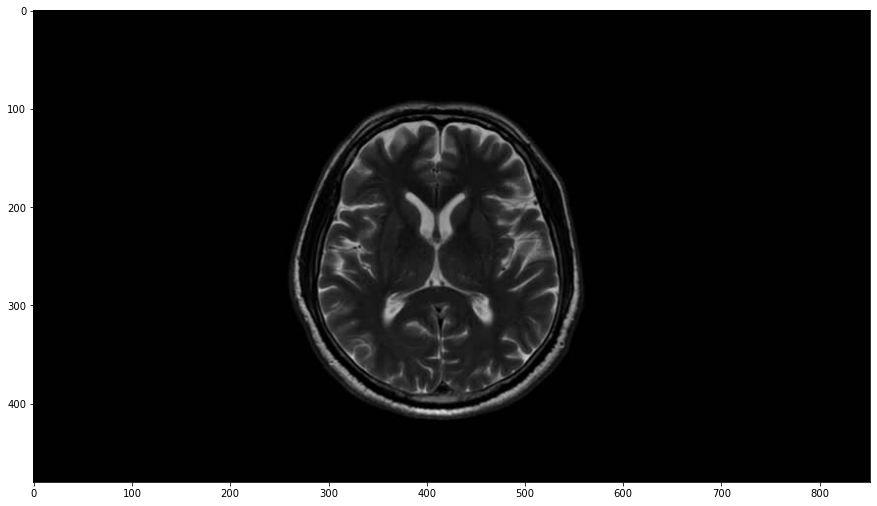

Class : No-tumor


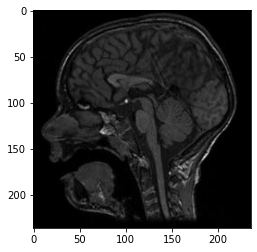

Class : No-tumor


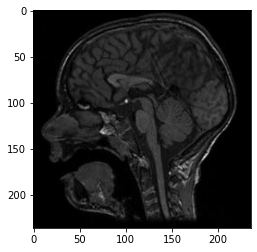

Class : glioma


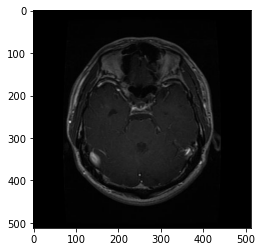

Class : glioma


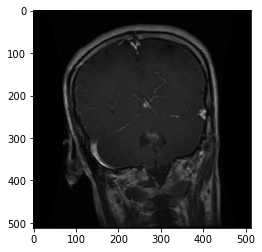

Class : glioma


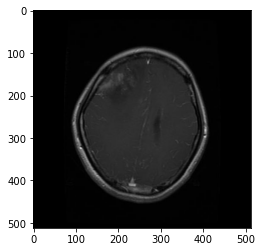

Class : meningioma


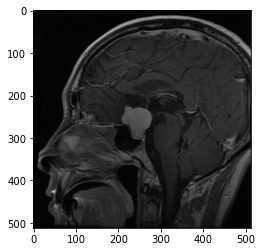

Class : meningioma


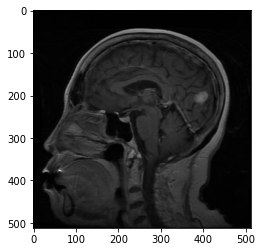

Class : meningioma


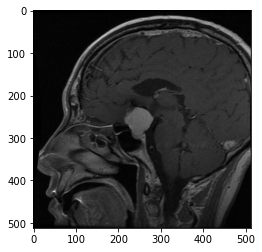

Class : pituitary


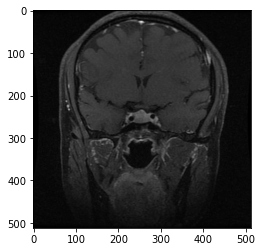

Class : pituitary


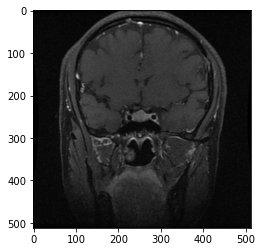

Class : pituitary


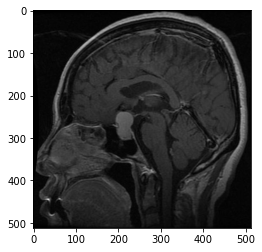

In [128]:

folder = "C:/Users/bogha/raw/"
count=0
plt.figure(figsize=(15,15))
for index, row in selected_df.iterrows():
    # Get the file name from the "filename" column
    filename = f'{selected_df.name.values[count]}.jpg'
    print(f'Class : {selected_df.Class.values[count]}')
    
    # Construct the full path to the image
    filepath = os.path.join(folder, filename)
    
    
    # Read the image using imread
    img = imread(filepath)
    plt.imshow(img)
    
    # Show the plot
    plt.show()
    count+=1

### Data Fitness

### Assessment for data fitness:

Looking at the values of the data, the data contains enough information to answer our classification.
We need to perform image transformation into numeric data, before proceeding to find classification of brain tumor. 
However, overall we find that the fitness of the data is good enough to perform classification of brain tumor.

### ETHICAL assessment

## A. Data Collection
 - [ ] **A.1 Informed consent**: If there are human subjects, have they given informed consent, where subjects affirmatively opt-in and have a clear understanding of the data uses to which they consent?
 ##### Since we found data of brain tumor image, they must have ethical principle.We have not get any personal information while getting the images and the usage is very clear as well.
 - [ ] **A.2 Collection bias**: Have we considered sources of bias that could be introduced during data collection and survey design and taken steps to mitigate those?
 ##### We have been concerned about bias in image extraction but we did not have much relevant information like age, gender, medical history of patients, Date of birth.
 - [ ] **A.3 Limit PII exposure**: Have we considered ways to minimize exposure of personally identifiable information (PII) for example through anonymization or not collecting information that isn't relevant for analysis?
 ##### The dataset does not have any personally identifiable information as it does not contain any personal relavant information such as age,gender. 
 - [ ] **A.4 Downstream bias mitigation**: Have we considered ways to enable testing downstream results for biased outcomes (e.g., collecting data on protected group status like race or gender)?
#### NO
## B. Data Storage
 - [ ] **B.1 Data security**: Do we have a plan to protect and secure data (e.g., encryption at rest and in transit, access controls on internal users and third parties, access logs, and up-to-date software)?
 #### The team members will keep the access limited to themselves only, making sure no one except the 5 group members get to use the data. The images will also be saved on github with access to the team only.
 - [ ] **B.2 Right to be forgotten**: Do we have a mechanism through which an individual can request their personal information be removed?
 #### We dont have any personal information.
 - [ ] **B.3 Data retention plan**: Is there a schedule or plan to delete the data after it is no longer needed?
 ##### Yes, we can do permenantly delete the every images when we dont need for longer use from every device.

## C. Analysis
 - [ ] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
 #### NO
 - [ ] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
 ##### The dataset has been examined for bias-causing for no-tumor class. All other three classes has almost equal number of images per class except no-tumor class has half compared to other . There are 3624 images in our image dataset, and the class distribution is as follows: Glioma:926 , Pituitary: 901, Meningioma:937, and No-tumor: 500 . It is clear that the numbers are not balanced. These images will be used to train a machine learning model; the more images the model sees, the better.
 - [ ] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
 ##### The team has concentrated its efforts on accurately portraying the data in this data assessment in order to steer the project in the proper path rather than leading it astray.
 - [ ] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
 ##### We dont have PII information in this project.
 - [ ] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?
 ##### The team has concentrated its efforts on accurately portraying the data in this data assessment in order to steer the project in the proper path rather than leading it in wrong path in the future.

## D. Modeling
##### We havenot started Modeling part yet. So Whenever we will start we can mention answers here in modeling.
 - [ ] **D.1 Proxy discrimination**: Have we ensured that the model does not rely on variables or proxies for variables that are unfairly discriminatory?
 ##### 
 - [ ] **D.2 Fairness across groups**: Have we tested model results for fairness with respect to different affected groups (e.g., tested for disparate error rates)?
 - [ ] **D.3 Metric selection**: Have we considered the effects of optimizing for our defined metrics and considered additional metrics?
 - [ ] **D.4 Explainability**: Can we explain in understandable terms a decision the model made in cases where a justification is needed?
 - [ ] **D.5 Communicate bias**: Have we communicated the shortcomings, limitations, and biases of the model to relevant stakeholders in ways that can be generally understood?      

## E. Deployment
##### We havenot started deployment yet but we are thinking to deploy our model into STREAMLIT.
 - [ ] **E.1 Redress**: Have we discussed with our organization a plan for response if users are harmed by the results (e.g., how does the data science team evaluate these cases and update analysis and models to prevent future harm)?
 - [ ] **E.2 Roll back**: Is there a way to turn off or roll back the model in production if necessary?
 - [ ] **E.3 Concept drift**: Do we test and monitor for concept drift to ensure the model remains fair over time?
 - [ ] **E.4 Unintended use**: Have we taken steps to identify and prevent unintended uses and abuse of the model and do we have a plan to monitor these once the model is deployed? 
